<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/S3MSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos = pd.read_csv("winequalityN.csv")


In [5]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import svm

from sklearn.model_selection import train_test_split


<Axes: xlabel='quality', ylabel='count'>

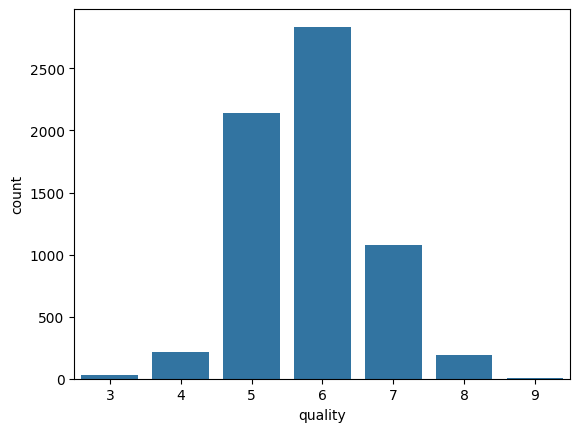

In [6]:
import seaborn as sb
sb.countplot(x="quality", data=datos)

<Axes: xlabel='quality', ylabel='count'>

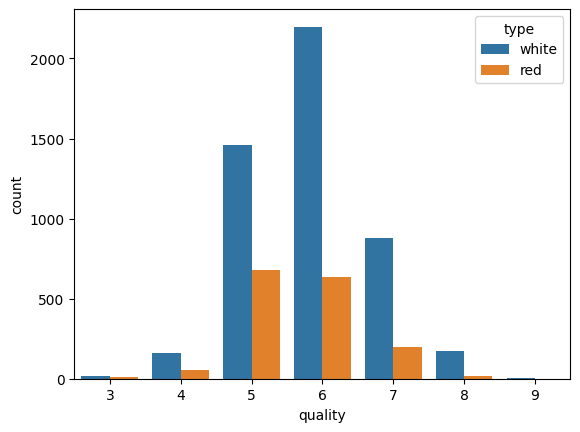

In [7]:
sb.countplot(x="quality", data=datos, hue="type")

In [8]:
datos.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
datos = datos.dropna()
#para quitar los que no tienen datos

In [10]:
datos.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
dummies_type = pd.get_dummies(datos["type"], drop_first=True)

In [12]:
datos = datos.join(dummies_type)

In [13]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [14]:
datos = datos.drop(["type"], axis=1)

In [15]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [16]:
datos.rename(columns={'white': 'Vino'}, inplace=True)

In [40]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Vino
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<Axes: >

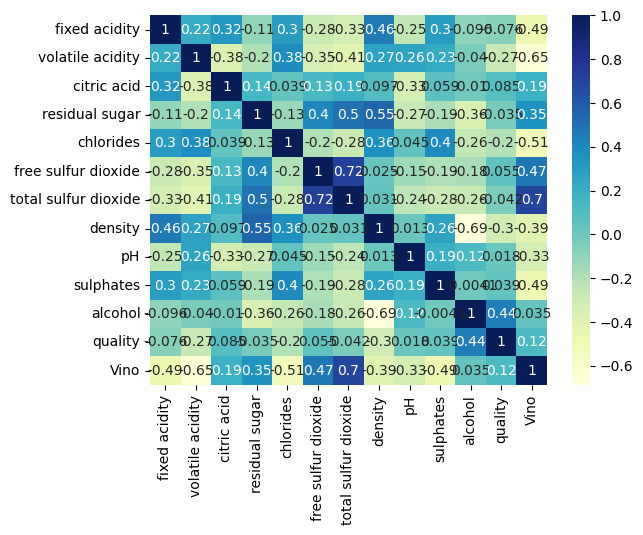

In [18]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")


In [19]:
datos.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Vino
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.753520
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.430995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [41]:
datos.shape


(6463, 13)

In [49]:
X = datos[['fixed acidity', 'volatile acidity']].values
y = datos['Vino'].values

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

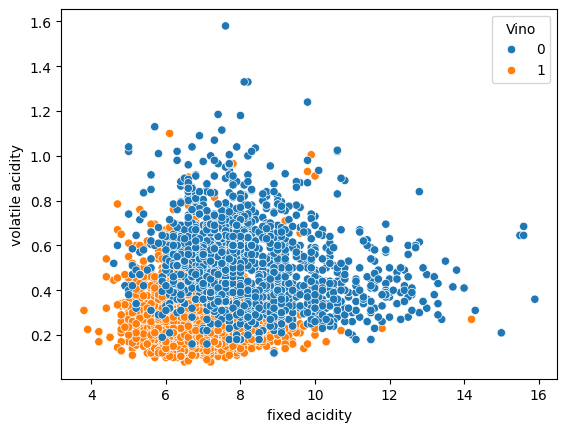

In [67]:
sb.scatterplot(x="fixed acidity", y="volatile acidity", data=datos, hue="Vino")

In [50]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [51]:
from sklearn import svm
modelo = svm.SVC(kernel='linear')
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [52]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
w = modelo.coef_[0]

b = modelo.intercept_[0]


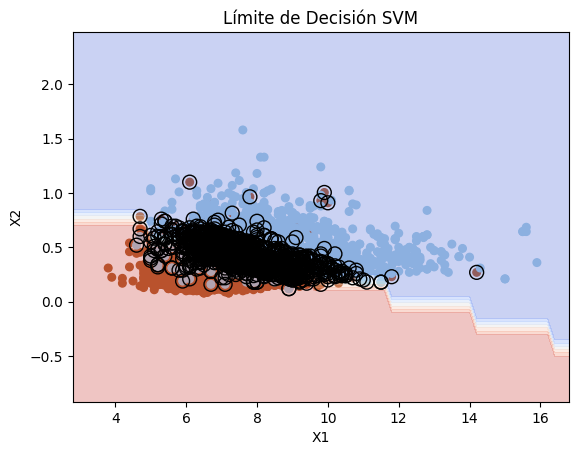

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))

Z = modelo.predict(np.c_[xx1.ravel(), xx2.ravel()])

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
x2_decision_boundary = (-w[0] * xx1 - b) / w[1]

plt.plot(xx1, x2_decision_boundary, 'k-')

plt.title('Límite de Decisión SVM')

plt.xlabel('X1')

plt.ylabel('X2')

plt.show()




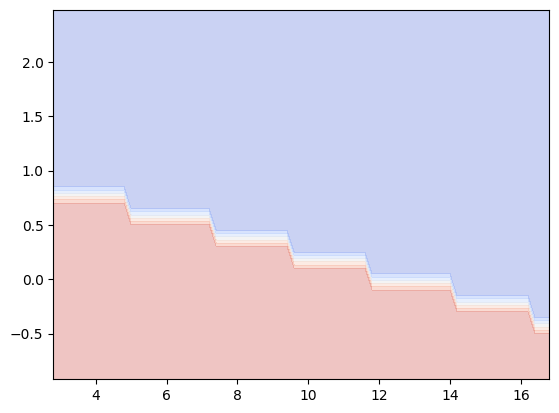

In [57]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))

Z = modelo.predict(np.c_[xx1.ravel(), xx2.ravel()])

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))

Z = modelo.predict(np.c_[xx1.ravel(), xx2.ravel()])

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.3)


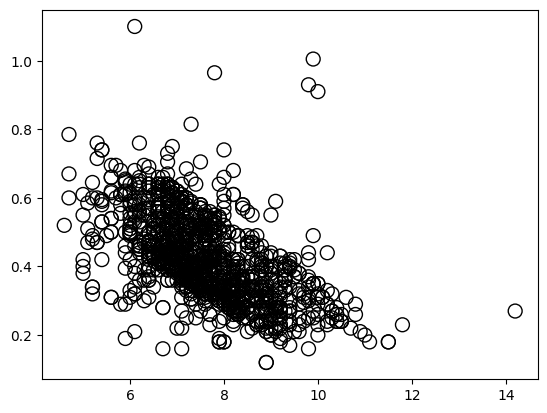

In [60]:
plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')


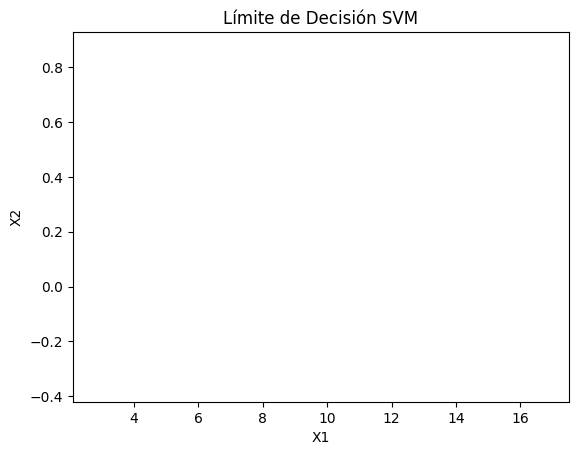

In [61]:
x2_decision_boundary = (-w[0] * xx1 - b) / w[1]

plt.plot(xx1, x2_decision_boundary, 'k-')

plt.title('Límite de Decisión SVM')

plt.xlabel('X1')

plt.ylabel('X2')

plt.show()


In [48]:
def plot_decision_boundary(modelo, X, y):
  X = X["fixed acidity", "volatile acidity"]
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
  np.arange(y_min, y_max, 0.1))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.title('Decision Boundary')


NameError: name 'xx' is not defined

In [24]:
def plot_decision_boundary(clf, X, y):
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
  np.arange(y_min, y_max, 0.1))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')


NameError: name 'xx' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.934261407579273

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       306
           1       0.94      0.98      0.96       987

    accuracy                           0.93      1293
   macro avg       0.93      0.88      0.90      1293
weighted avg       0.93      0.93      0.93      1293



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[241,  65],
       [ 20, 967]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index= ["Real: No", "Real: Si"])


,Pred: No,Pred: Si
Real: No,241,65
Real: Si,20,967
